In [16]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

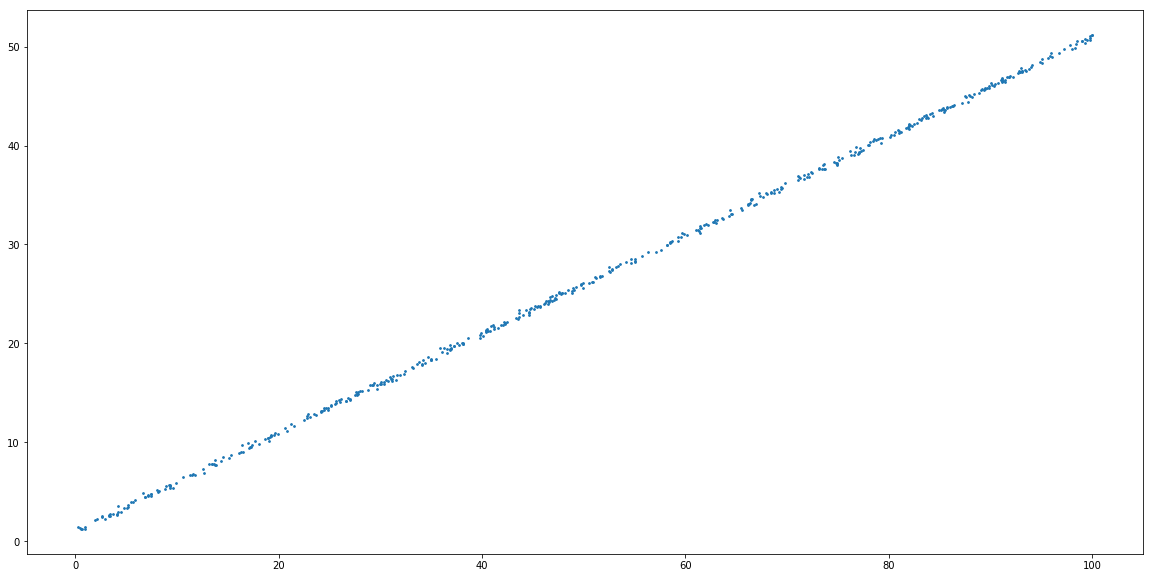

In [12]:
bounds = (0, 100)
size_of_sample = 500
X = sps.uniform.rvs(bounds[0], bounds[1], size_of_sample)
noise = sps.norm.rvs(0, 0.2, size_of_sample)
Y = 0.5 * X + noise + 1

plt.figure(figsize=(20, 10))
plt.scatter(X, Y, s=3)
plt.show()

In [22]:
from scipy.optimize import minimize

In [28]:
def model(k):
    return k[0] * X + k[1]

def fun(k):
    return np.sum((model(k) - Y)**2)


res = minimize(fun, [0, 1.5])

In [37]:
print "MSE has a result as k = %f, b = %f and a value of minimised func as : %f" % (res.x[0], res.x[1], fun(res.x))

MSE has a result as k = 0.500146, b = 0.994311 and a value of minimised func as : 18.800026


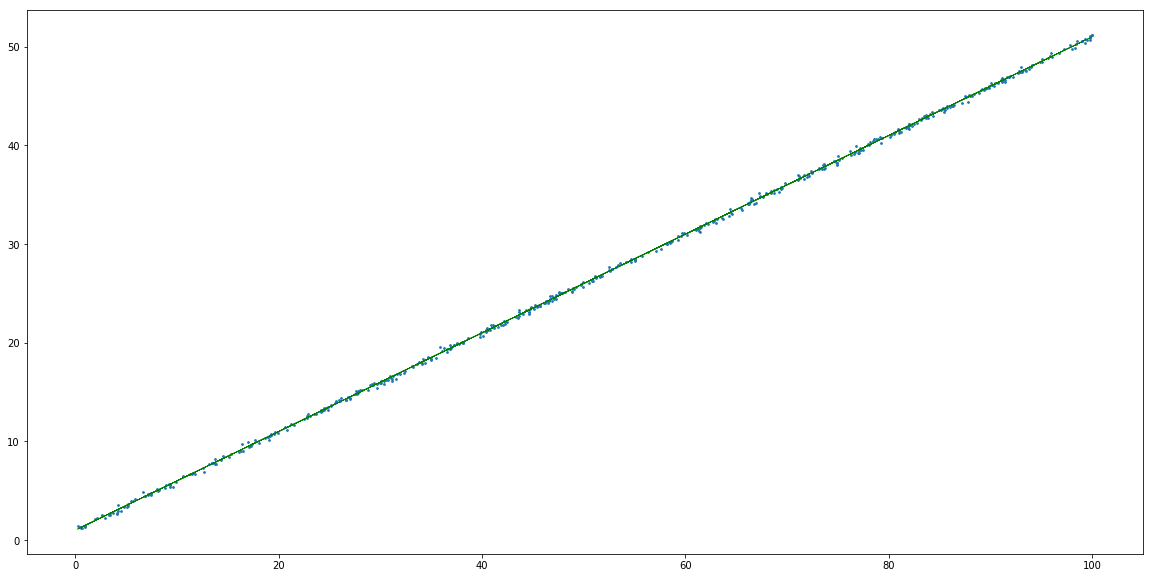

In [35]:
plt.figure(figsize=(20, 10))
plt.scatter(X, Y, s=3)
plt.plot(X, model(res.x),c='g',linewidth=0.7)
plt.show()

MSE has a result as k = 0.450598, b = 0.145170 and a value of minimised func as : 57719.779273

MAE has a result as k = 0.500168, b = 0.953347 and a value of minimised func as : 3413.043402


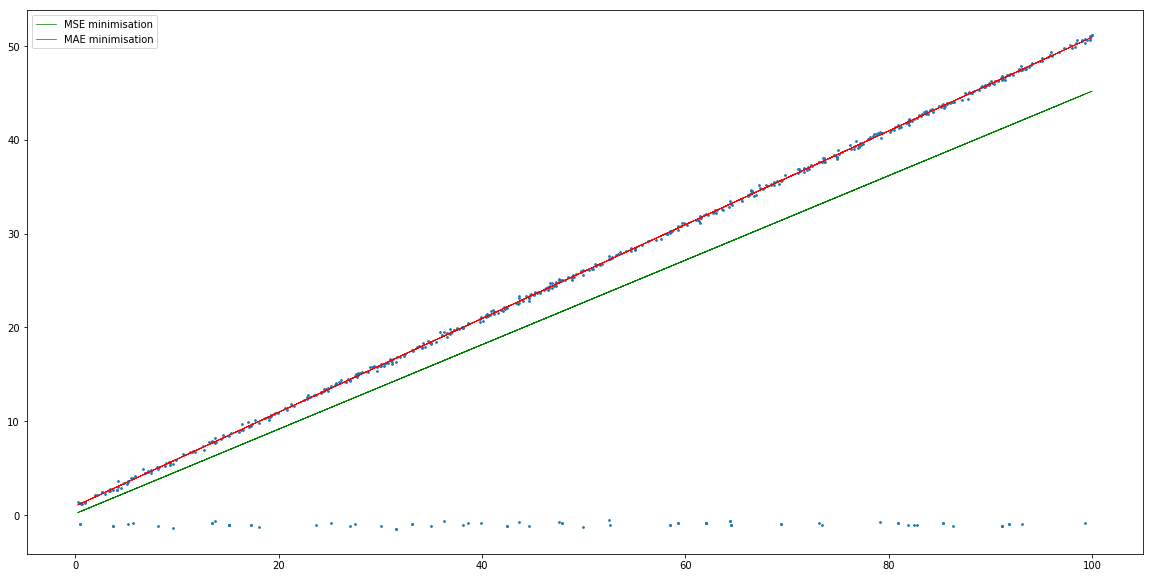

In [57]:
blowout_size = 75
blowout_id = np.array(map(int,sps.uniform.rvs(bounds[0],bounds[1], blowout_size)))
X_blowout = X[blowout_id]
noise_blowout = noise[blowout_id]
Y_blowout = -1 + noise_blowout


X_new = np.array(list(X) + list(X_blowout))
Y_new = np.array(list(Y) + list(Y_blowout))

def model_new(k):
    return k[0] * X_new + k[1]

def MSE_fun_new(k):
    return np.sum((model_new(k) - Y_new)**2)

def MAE_fun_new(k):
    return np.sum(np.abs(model_new(k) - Y_new))


res = minimize(MSE_fun_new, [0, 1.5])
res_MAE = minimize(MAE_fun_new, [0, 1.5])

print "MSE has a result as k = %f, b = %f and a value of minimised func as : %f\n" % (res.x[0], res.x[1], MSE_fun_new(res.x))
print "MAE has a result as k = %f, b = %f and a value of minimised func as : %f" % (res_MAE.x[0], res_MAE.x[1], MAE_fun_new(res.x))

plt.figure(figsize=(20, 10))
plt.scatter(X_new, Y_new, s=3)
plt.plot(X, model(res.x),c='g',linewidth=0.7, label="MSE minimisation")
plt.plot(X, model(res_MAE.x),c='r',linewidth=0.7,label="MAE minimisation")
plt.legend()
plt.show()

Функция ошибки в виде суммы абсолютной ошибки более устойчива к выбросам